## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
%matplotlib inline
plt.style.use('fivethirtyeight')

## Load the dataset into a Pandas dataframe

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,NaN,NaN,NaN,0
1,29,Male,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,202.0,False,0.0,upsloping,0.0,normal,0
2,29,Male,Hungary,atypical angina,120.0,243.0,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
3,29,Male,Hungary,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
4,30,Female,Hungary,typical angina,170.0,237.0,False,st-t abnormality,170.0,False,0.0,NaN,NaN,fixed defect,0


In [3]:
df['dataset'].value_counts()

Cleveland        3649
Hungary          3554
VA Long Beach    1812
Name: dataset, dtype: int64

In [5]:
df.drop(['ca','thal'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9015 non-null   int64  
 1   sex       9015 non-null   object 
 2   dataset   9015 non-null   object 
 3   cp        9015 non-null   object 
 4   trestbps  8543 non-null   float64
 5   chol      8698 non-null   float64
 6   fbs       8842 non-null   object 
 7   restecg   9005 non-null   object 
 8   thalch    8553 non-null   float64
 9   exang     8553 non-null   object 
 10  oldpeak   8533 non-null   float64
 11  slope     5777 non-null   object 
 12  num       9015 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 915.7+ KB


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,9015.000000,8543.000000,8698.000000,8553.000000,8533.000000,9015.000000
mean,48.038270,132.507901,240.896068,141.454110,0.892277,0.817748
std,12.803475,17.744470,67.743797,25.051878,1.081099,1.073800
min,21.000000,92.000000,0.000000,69.000000,0.000000,0.000000
25%,41.000000,120.000000,207.000000,122.000000,0.000000,0.000000
50%,50.000000,130.000000,236.000000,143.000000,0.500000,0.000000
75%,58.000000,140.000000,275.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.104072,0.035087,-0.170532,0.153520,0.200939
trestbps,0.104072,1.000000,0.078395,-0.120439,0.195427,0.181901
chol,0.035087,0.078395,1.000000,0.002850,-0.001837,0.007634
thalch,-0.170532,-0.120439,0.002850,1.000000,-0.241488,-0.312993
oldpeak,0.153520,0.195427,-0.001837,-0.241488,1.000000,0.547321
num,0.200939,0.181901,0.007634,-0.312993,0.547321,1.000000


## Basic Visualization

<AxesSubplot:>

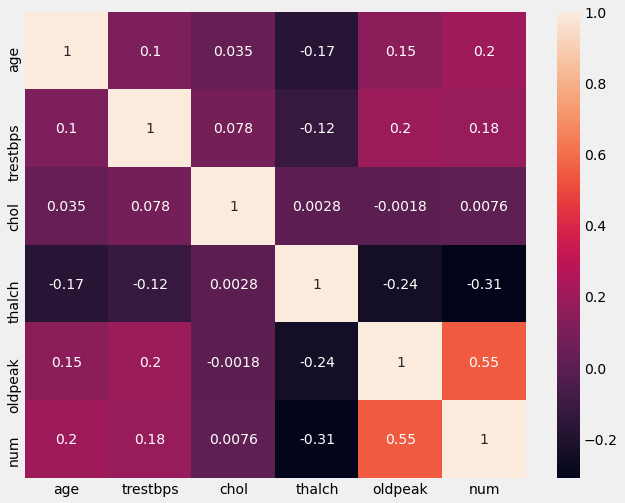

In [9]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

<AxesSubplot:xlabel='sex', ylabel='count'>

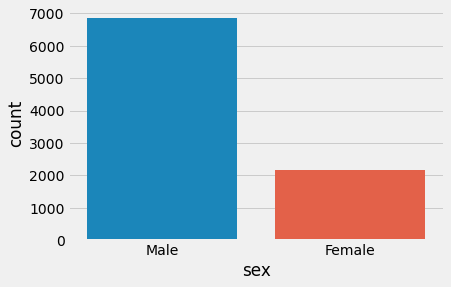

In [10]:
sns.countplot(x=df.sex)

<AxesSubplot:xlabel='dataset', ylabel='count'>

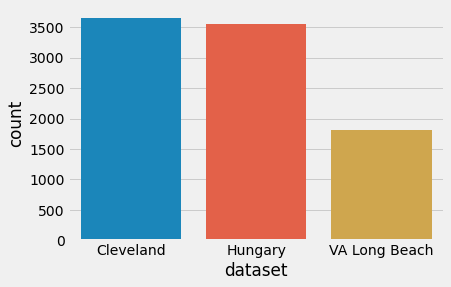

In [11]:
sns.countplot(x=df['dataset'])

<AxesSubplot:xlabel='cp', ylabel='count'>

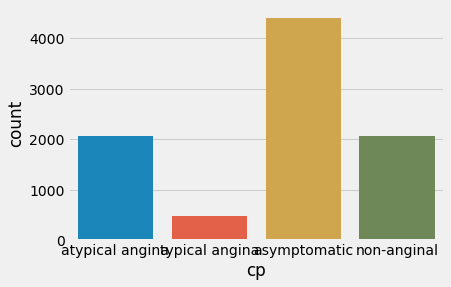

In [12]:
sns.countplot(x=df['cp'])

<AxesSubplot:xlabel='fbs', ylabel='count'>

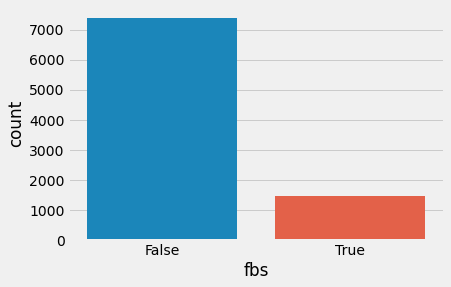

In [13]:
sns.countplot(x=df['fbs'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

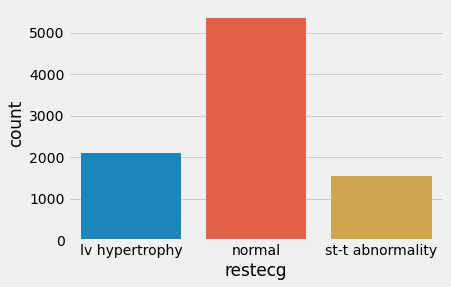

In [14]:
sns.countplot(x=df['restecg'])

In [15]:
df['restecg'].value_counts()

normal              5351
lv hypertrophy      2102
st-t abnormality    1552
Name: restecg, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

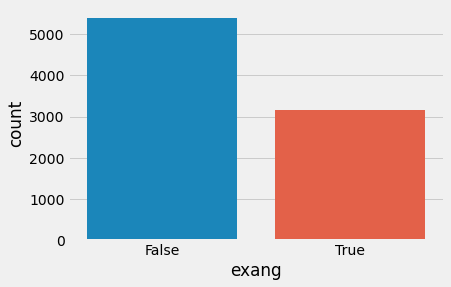

In [16]:
sns.countplot(x=df['exang'])

<AxesSubplot:xlabel='slope', ylabel='count'>

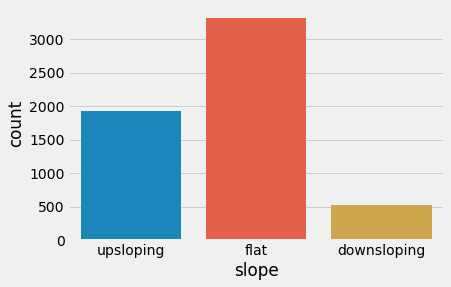

In [17]:
sns.countplot(x=df['slope'])

<AxesSubplot:xlabel='num', ylabel='count'>

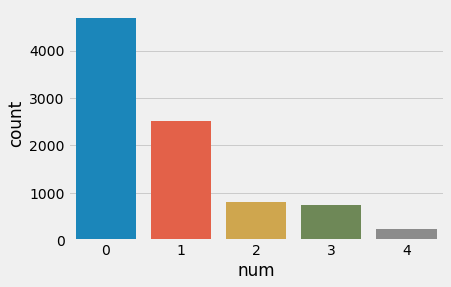

In [18]:
sns.countplot(x=df['num'])

In [19]:
list(df.columns)

['age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'num']

# Machine Learning

In [20]:
# Check for missing data
df.dropna(inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5577 entries, 1 to 9013
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5577 non-null   int64  
 1   sex       5577 non-null   object 
 2   dataset   5577 non-null   object 
 3   cp        5577 non-null   object 
 4   trestbps  5577 non-null   float64
 5   chol      5577 non-null   float64
 6   fbs       5577 non-null   object 
 7   restecg   5577 non-null   object 
 8   thalch    5577 non-null   float64
 9   exang     5577 non-null   object 
 10  oldpeak   5577 non-null   float64
 11  slope     5577 non-null   object 
 12  num       5577 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 610.0+ KB


In [22]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])
df['dataset']= label_encoder.fit_transform(df['dataset'])
df['cp']= label_encoder.fit_transform(df['cp'])
df['fbs']= label_encoder.fit_transform(df['fbs'])
df['restecg']= label_encoder.fit_transform(df['restecg'])
df['exang']= label_encoder.fit_transform(df['exang'])
df['slope']= label_encoder.fit_transform(df['slope'])

df['sex'].unique()
df['dataset'].unique()
df['cp'].unique()
df['fbs'].unique()
df['restecg'].unique()
df['exang'].unique()
df['slope'].unique()

array([2, 1, 0])

In [23]:
df.shape

(5577, 13)

In [24]:
X = df.iloc[:, 0:12]
y = df.iloc[:,12]

In [25]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
1,29,1,0,1,130.0,204.0,0,0,202.0,0,0.0,2
6,31,1,1,0,120.0,270.0,0,1,153.0,1,1.5,1
11,33,0,1,0,100.0,246.0,0,1,150.0,1,1.0,1
15,34,1,0,3,118.0,182.0,0,0,174.0,0,0.0,2
16,34,0,0,1,118.0,210.0,0,1,192.0,0,0.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9006,43,1,1,0,150.0,247.0,0,1,130.0,1,2.0,1
9009,43,1,1,0,140.0,288.0,0,1,135.0,1,2.0,1
9011,43,1,0,0,115.0,303.0,0,1,181.0,0,1.2,1
9012,43,1,0,2,130.0,315.0,0,1,162.0,0,1.9,2


In [26]:
y

1       0
6       1
11      1
15      0
16      0
       ..
9006    1
9009    1
9011    0
9012    0
9013    2
Name: num, Length: 5577, dtype: int64

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Support Vctor Machine

In [28]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, y)
predictions = SVM.predict(X)
val1 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y, predictions))

*Accuracy score for SVM:  53.05719921104537 

*Confusion Matrix for SVM: 
[[1977  446    0    0    0]
 [ 766  982    0    0    0]
 [ 282  351    0    0    0]
 [ 211  373    0    0    0]
 [ 107   82    0    0    0]]


In [29]:
print("*Classification Report for SVM: ")
print(classification_report(y, predictions))

*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.59      0.82      0.69      2423
           1       0.44      0.56      0.49      1748
           2       0.00      0.00      0.00       633
           3       0.00      0.00      0.00       584
           4       0.00      0.00      0.00       189

    accuracy                           0.53      5577
   macro avg       0.21      0.28      0.24      5577
weighted avg       0.39      0.53      0.45      5577



C:\Users\manik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RAndom Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, y)
predictions = RF.predict(X)
val2 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y, predictions))

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[2423    0    0    0    0]
 [   0 1748    0    0    0]
 [   0    0  633    0    0]
 [   0    0    0  584    0]
 [   0    0    0    0  189]]


In [31]:
print("*Classification Report for RF: ")
print(classification_report(y, predictions))

*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      1.00      1.00      1748
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       584
           4       1.00      1.00      1.00       189

    accuracy                           1.00      5577
   macro avg       1.00      1.00      1.00      5577
weighted avg       1.00      1.00      1.00      5577



# Decison Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X, y)
predictions = DT.predict(X)
val3 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for DT: ", val3, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y, predictions))

*Accuracy score for DT:  59.54814416352878 

*Confusion Matrix for DT: 
[[2094  198  131    0    0]
 [ 613  885  250    0    0]
 [ 155  168  310    0    0]
 [ 120  153  279   32    0]
 [  40   40  109    0    0]]


In [33]:
print("*Classification Report for DT: ")
print(classification_report(y, predictions))

*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      2423
           1       0.61      0.51      0.55      1748
           2       0.29      0.49      0.36       633
           3       1.00      0.05      0.10       584
           4       0.00      0.00      0.00       189

    accuracy                           0.60      5577
   macro avg       0.52      0.38      0.36      5577
weighted avg       0.63      0.60      0.56      5577



C:\Users\manik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X, y)
predictions = LR.predict(X)
val4 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for LR: ", val4, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y, predictions))

*Accuracy score for LR:  60.15779092702169 

*Confusion Matrix for LR: 
[[2090  313    0   20    0]
 [ 498 1245    0    5    0]
 [ 154  452    0   27    0]
 [ 149  415    0   20    0]
 [  40  139    0   10    0]]


C:\Users\manik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print("*Classification Report for LR: ")
print(classification_report(y, predictions))

*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      2423
           1       0.49      0.71      0.58      1748
           2       0.00      0.00      0.00       633
           3       0.24      0.03      0.06       584
           4       0.00      0.00      0.00       189

    accuracy                           0.60      5577
   macro avg       0.29      0.32      0.28      5577
weighted avg       0.49      0.60      0.53      5577



C:\Users\manik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)
predictions = KNN.predict(X)
val6 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for KNN: ", val6, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y, predictions))

*Accuracy score for KNN:  100.0 

*Confusion Matrix for KNN: 
[[2423    0    0    0    0]
 [   0 1748    0    0    0]
 [   0    0  633    0    0]
 [   0    0    0  584    0]
 [   0    0    0    0  189]]


In [37]:
print("*Classification Report for KNN: ")
print(classification_report(y, predictions))

*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      1.00      1.00      1748
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       584
           4       1.00      1.00      1.00       189

    accuracy                           1.00      5577
   macro avg       1.00      1.00      1.00      5577
weighted avg       1.00      1.00      1.00      5577



# XGBoost

In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

val7 = (accuracy_score(y, y_pred)*100)
print("*Accuracy score for XGB: ", val7, "\n")

C:\Users\manik\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*Accuracy score for XGB:  100.0 



In [39]:
print("*Classification Report for NB: ")
print(classification_report(y, predictions))

*Classification Report for NB: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      1.00      1.00      1748
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       584
           4       1.00      1.00      1.00       189

    accuracy                           1.00      5577
   macro avg       1.00      1.00      1.00      5577
weighted avg       1.00      1.00      1.00      5577



# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X, y)
predictions = NB.predict(X)
val8 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for NB: ", val8, "\n")
print("*Confusion Matrix for NB: ")
print(confusion_matrix(y, predictions))

*Accuracy score for NB:  60.83916083916085 

*Confusion Matrix for NB: 
[[2001  300   47   41   34]
 [ 434 1058  124  111   21]
 [ 133  232  148  100   20]
 [ 110  200   85  172   17]
 [  36   41   17   81   14]]


In [41]:
print("*Classification Report for NB: ")
print(classification_report(y, predictions))

*Classification Report for NB: 
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2423
           1       0.58      0.61      0.59      1748
           2       0.35      0.23      0.28       633
           3       0.34      0.29      0.32       584
           4       0.13      0.07      0.09       189

    accuracy                           0.61      5577
   macro avg       0.43      0.41      0.41      5577
weighted avg       0.58      0.61      0.59      5577



# Voting Classifier

In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
vot.fit(X, y)
predictions = vot.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Voting Classifier: 
[[2423    0    0    0    0]
 [   0 1748    0    0    0]
 [   0    0  633    0    0]
 [   0    0    0  584    0]
 [   0    0    0    0  189]]


In [43]:
val9 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Voting: ", val9, "\n")

*Accuracy score for Voting:  100.0 



In [44]:
print("*Classification Report for Voting Classifier: ")
print(classification_report(y, predictions))

*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      1.00      1.00      1748
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       584
           4       1.00      1.00      1.00       189

    accuracy                           1.00      5577
   macro avg       1.00      1.00      1.00      5577
weighted avg       1.00      1.00      1.00      5577



# GBDT

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator=DecisionTreeClassifier(max_depth=1,criterion='gini', splitter='best', min_samples_split=2)
model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=100)
model.fit(X, y)
predictions = model.predict(X)
print("*Confusion Matrix for GBDT: ")
print(confusion_matrix(y, predictions))
val10 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for GBDT: ", val10, "\n")
print("*Classification Report for GBDT: ")
print(classification_report(y, predictions))

*Confusion Matrix for GBDT: 
[[2105  179   82   57    0]
 [ 743  700  125  162   18]
 [ 160  187  187   40   59]
 [ 138  130   82  186   48]
 [   0   10   30   22  127]]
*Accuracy score for GBDT:  59.26125156894388 

*Classification Report for GBDT: 
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      2423
           1       0.58      0.40      0.47      1748
           2       0.37      0.30      0.33       633
           3       0.40      0.32      0.35       584
           4       0.50      0.67      0.58       189

    accuracy                           0.59      5577
   macro avg       0.50      0.51      0.50      5577
weighted avg       0.57      0.59      0.57      5577



# Bagging + GBDT

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
eclf1 = VotingClassifier(estimators=[('bagging', clf1), ('gbdt', model)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Bagging + GBDT: ")
print(confusion_matrix(y, predictions))

*Confusion Matrix for Bagging + GBDT: 
[[2423    0    0    0    0]
 [ 743 1005    0    0    0]
 [ 160  187  286    0    0]
 [ 138  130   82  234    0]
 [   0   10   30   22  127]]


In [47]:
val11 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Bagging + GBDT: ", val11, "\n")
print("*Classification Report for Bagging + GBDT: ")
print(classification_report(y, predictions))

*Accuracy score for Bagging + GBDT:  73.0679576833423 

*Classification Report for Bagging + GBDT: 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2423
           1       0.75      0.57      0.65      1748
           2       0.72      0.45      0.55       633
           3       0.91      0.40      0.56       584
           4       1.00      0.67      0.80       189

    accuracy                           0.73      5577
   macro avg       0.82      0.62      0.68      5577
weighted avg       0.75      0.73      0.71      5577



# Bagging + Fuzzy + GBDT

In [49]:
eclf1 = VotingClassifier(estimators=[('bagging', clf1),('fuzzy', clf2), ('gbdt', model)], voting='hard')
eclf1.fit(X, y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Bagging + Fuzzy + GBDT: ")
print(confusion_matrix(y, predictions))
val13 = (accuracy_score(y, predictions)*100)
print("*Accuracy score for Bagging + Fuzzy + GBDT: ", val13, "\n")
print("*Classification Report for Bagging + Fuzzy + GBDT: ")
print(classification_report(y, predictions))

*Confusion Matrix for Bagging + Fuzzy + GBDT: 
[[2397   26    0    0    0]
 [  42 1706    0    0    0]
 [   0    0  633    0    0]
 [  11    0    0  573    0]
 [   0    0    0    0  189]]
*Accuracy score for Bagging + Fuzzy + GBDT:  98.58346781423705 

*Classification Report for Bagging + Fuzzy + GBDT: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2423
           1       0.98      0.98      0.98      1748
           2       1.00      1.00      1.00       633
           3       1.00      0.98      0.99       584
           4       1.00      1.00      1.00       189

    accuracy                           0.99      5577
   macro avg       0.99      0.99      0.99      5577
weighted avg       0.99      0.99      0.99      5577



# Accuracy Comparison

In [63]:
score = [val1,val3,val4,val8,val10,val11,val13]

In [64]:
#make variabel for save the result and to show it
classifier = ('SVM','DT','LR','Gaussian Naive Bayes','GBDT','Bagging+GBDT','Bagging+Fuzzy+GBDT')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6]
[53.05719921104537, 59.54814416352878, 60.15779092702169, 60.83916083916085, 59.26125156894388, 73.0679576833423, 98.58346781423705]


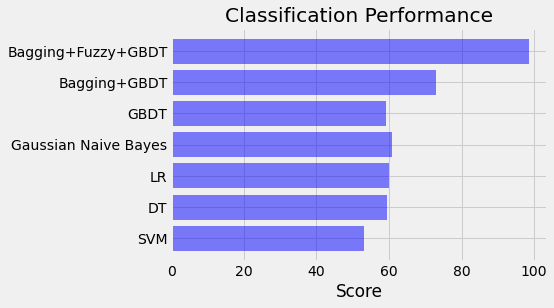

In [65]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [62]:
import joblib
filename = 'model.sav'
joblib.dump(vot, filename)

['model.sav']